# Binomial Distribution: Quantal Release Exercises

## Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [1]:
#load packages
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import binom
import time
from IPython.display import clear_output

There is a 0.10737418240000006 probability that 0 quanta are released
There is a 0.26843545599999985 probability that 1 quanta are released
There is a 0.30198988800000004 probability that 2 quanta are released
There is a 0.20132659199999992 probability that 3 quanta are released
There is a 0.0880803839999999 probability that 4 quanta are released
There is a 0.026424115199999983 probability that 5 quanta are released
There is a 0.005505024000000005 probability that 6 quanta are released
There is a 0.000786432 probability that 7 quanta are released
There is a 7.372800000000001e-05 probability that 8 quanta are released
There is a 4.095999999999997e-06 probability that 9 quanta are released
There is a 1.0240000000000006e-07 probability that 10 quanta are released


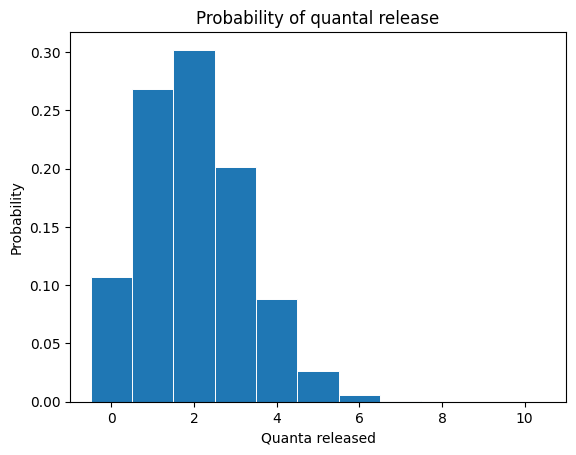

In [2]:
n=10 #number quanta (aka trials)
p=0.2 #probability
xs = range(n+1) #possible number quanta released per trial

Y = binom.pmf(xs,n,p) #distribution

#plot
plt.bar(xs, Y, width=1, edgecolor="white", linewidth=0.7)
plt.xlim([-1, n+1])
plt.title('Probability of quantal release')
plt.xlabel('Quanta released')
plt.ylabel('Probability')

#answer in words
q=0
for y in Y:
    print(f'There is a {y} probability that {q} quanta are released')
    q=q+1

## Exercise 2

Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

In [3]:
#Iterate across range of p's to extract calculated value of 8 quanta being released
n_e2=14 #number quanta (aka trials)
p_e2=0.1 #starting p
xs_e2 = range(n+1) #possible number quanta released per trial

while p_e2 <= 1:
    Y = binom.pmf(xs_e2,n_e2,p_e2) #distribution
    print(f'There is a {round(Y[8],5)} probability that 8 quanta are released when p = {p_e2}')
    p_e2 = round(p_e2 + 0.1,2) #update to new p   

There is a 2e-05 probability that 8 quanta are released when p = 0.1
There is a 0.00202 probability that 8 quanta are released when p = 0.2
There is a 0.02318 probability that 8 quanta are released when p = 0.3
There is a 0.09182 probability that 8 quanta are released when p = 0.4
There is a 0.18329 probability that 8 quanta are released when p = 0.5
There is a 0.2066 probability that 8 quanta are released when p = 0.6
There is a 0.1262 probability that 8 quanta are released when p = 0.7
There is a 0.03224 probability that 8 quanta are released when p = 0.8
There is a 0.00129 probability that 8 quanta are released when p = 0.9
There is a 0.0 probability that 8 quanta are released when p = 1.0


## Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [4]:
#let's just focus on the scenario where p=0.1 for now
#take the log-likelihood of 8 and 5 quanta released and sum:
Y = binom.pmf(xs_e2,n_e2,0.1) #probabilities when p=0.1 
total_log_lik = np.log(Y[8]) + np.log(Y[5])
total_lik = (Y[8]) * (Y[5])
print(f'Total log likelihood at p=0.1: {total_log_lik}')
print(f'Total likelihood at p=0.1: {total_lik}')

Total log likelihood at p=0.1: -15.90474491593149
Total likelihood at p=0.1: 1.2378187214998254e-07


In [5]:
#compute over deciles from p=0 to 1
p_new=0
dict_log = {} #dictionary to store p and total log likelihood
dict_total = {} #dictionary to store p and total likelihood

while p_new <= 1:
    Y = binom.pmf(xs_e2,n_e2,p_new) #distribution
    total_log_lik = np.log(Y[8]) + np.log(Y[5]) #calc total log likelihood
    dict_log[p_new] = float(total_log_lik) #add total log likelihood to dictionary
    total_lik = (Y[8]) * (Y[5])
    dict_total[p_new]=total_lik
    p_new = round(p_new + 0.1,2) #update to new p 

max_log_p = max(dict_log, key=dict_log.get)
max_p = max(dict_total, key=dict_total.get)
print(f'The most likely p tested by log at decile intervals is {max_log_p}')
print(f'The most likely p tested at decile intervals is {max_p}')

The most likely p tested by log at decile intervals is 0.5
The most likely p tested at decile intervals is 0.5


/var/folders/jr/svb23qhs0wgfdhp2lf79s4zm0000gq/T/ipykernel_72609/4018951317.py:8: RuntimeWarning: divide by zero encountered in log
  total_log_lik = np.log(Y[8]) + np.log(Y[5]) #calc total log likelihood


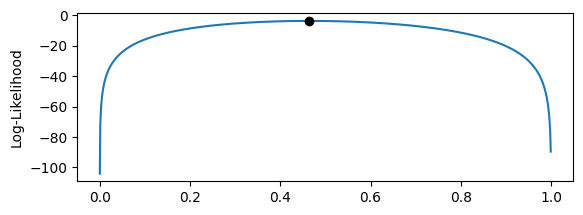

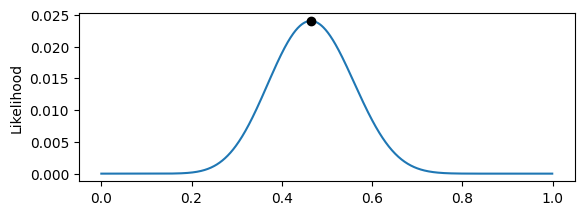

In [6]:
#now let's go higher res with p's tested
p_range = np.arange(0.0001, 0.9999, 0.001)  #more efficient way to define array of p's to test
dict_log = {} #dictionary to store p and total log likelihood
dict_total = {} #dictionary to store p and total likelihood

for p_val in p_range:
    Y = binom.pmf(xs_e2,n_e2,p_val) #distribution
    total_log_lik = np.log(Y[8]) + np.log(Y[5]) #calc total log likelihood
    dict_log[p_val] = float(total_log_lik) #add total log likelihood to dictionary
    total_lik = (Y[8]) * (Y[5])
    dict_total[p_val]=total_lik

# plot both
plt.subplot(211)
plt.ylabel('Log-Likelihood') 
plt.plot(*zip(*sorted(dict_log.items())))
max_log_p = max(dict_log, key=dict_log.get)
plt.plot(max_log_p, dict_log[max_log_p], 'ko') #x=most likely p val, y=maxlog-likelihood
plt.show()

plt.subplot(212)
plt.ylabel('Likelihood')
plt.plot(*zip(*sorted(dict_total.items())))
max_p = max(dict_total, key=dict_total.get)
plt.plot(max_p, dict_total[max_p], 'ko')
plt.show()

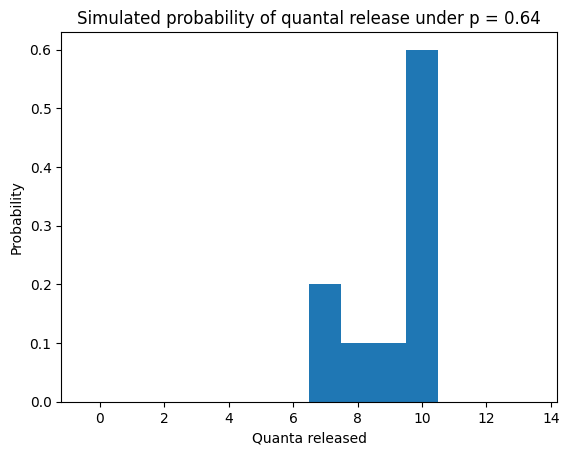

KeyboardInterrupt: 

In [13]:
#and increase the sample size - switch from theoretical to simulated distributions
samp_range = range(10, 100, 10)
p = np.arange(0.001, 0.99, 0.1)
for sample in samp_range: 
    for p in p_range:
        counts = binom.rvs(n_e2,p,size=sample)

        # Plot normalized histogram of simulated counts
        plt.hist(counts, np.arange(-0.5, n_e2+0.5, 1), density=True)
        plt.title(f'Simulated probability of quantal release under p = {round(p, 2)}, n = {sample}')
        plt.xlabel('Quanta released')
        plt.ylabel('Probability')

        # wait before next plot
        plt.show()
        time.sleep(0.5)
        clear_output(wait=True)